# Estimating Covid-19 Death Rate
In this Data Science tutorial we will do some analysis on the Death rate of the pandemic Covid-19 using python.``

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Now load the main data table and display it ;

In [20]:
df = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


The columns in the table are as follows: 

Date: The date of the snapshot.                                             
Country: The name of the country.                                                          
Population: The total population of the country as of the snapshot date.                                                         
Total Tests: The total number of COVID-19 tests conducted in the country as of the snapshot date.                                                          
Total Cases: The total number of confirmed COVID-19 cases in the country as of the snapshot date.                                
Total Deaths: The total number of COVID-19 related deaths in the country as of the snapshot date.                              
Total Recovered: The total number of COVID-19 recoveries in the country as of the snapshot date.                               
Serious or Critical: The total number of COVID-19 patients in a serious or critical condition in the country as of the snapshot date.                                                 
Active Cases: The total number of active COVID-19 cases in the country as of the snapshot date.                             
The data appears to be sourced from Worldometer, which is a website that provides real-time statistics for a wide range of topics, including population, health, economics, and the environment.          

In [22]:
df.shape

(6603, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [25]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [26]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

# To display a sub-table of a specific country

In [29]:
pakistan = df.loc[df['Country']=='Pakistan']
pakistan.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
19,2020-04-18,Pakistan,220356788,92548.0,7638.0,143.0,1832.0,46.0,5663.0
232,2020-04-19,Pakistan,220356788,98522.0,8348.0,168.0,1868.0,46.0,6312.0
445,2020-04-20,Pakistan,220356788,104302.0,8892.0,176.0,1970.0,46.0,6746.0
658,2020-04-21,Pakistan,220356788,111806.0,9565.0,201.0,2073.0,46.0,7291.0
871,2020-04-22,Pakistan,220356788,118020.0,10076.0,212.0,2156.0,58.0,7708.0


In [31]:
pakistan['Total Deaths'].value_counts()

143.0    1
476.0    1
873.0    1
834.0    1
803.0    1
770.0    1
761.0    1
724.0    1
667.0    1
659.0    1
636.0    1
599.0    1
585.0    1
544.0    1
514.0    1
457.0    1
168.0    1
437.0    1
417.0    1
361.0    1
343.0    1
312.0    1
292.0    1
281.0    1
269.0    1
253.0    1
235.0    1
212.0    1
201.0    1
176.0    1
903.0    1
Name: Total Deaths, dtype: int64

In [33]:
pak_deaths = pakistan['Total Deaths']
pak_deaths

19      143.0
232     168.0
445     176.0
658     201.0
871     212.0
1084    235.0
1297    253.0
1510    269.0
1723    281.0
1936    292.0
2149    312.0
2362    343.0
2575    361.0
2788    417.0
3001    437.0
3214    457.0
3427    476.0
3640    514.0
3853    544.0
4066    585.0
4279    599.0
4492    636.0
4705    659.0
4918    667.0
5131    724.0
5344    761.0
5557    770.0
5770    803.0
5983    834.0
6196    873.0
6409    903.0
Name: Total Deaths, dtype: float64

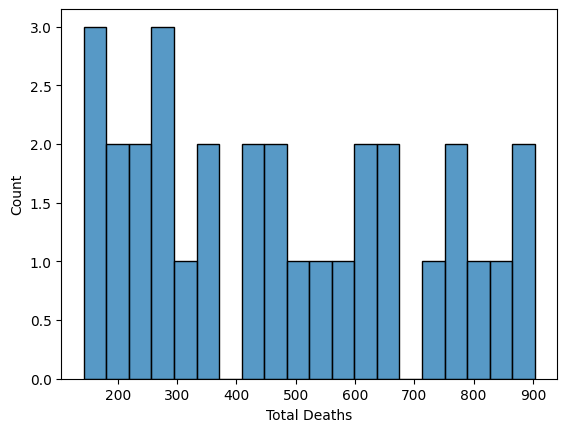

In [34]:
sns.histplot(pak_deaths,bins=20)
plt.show()

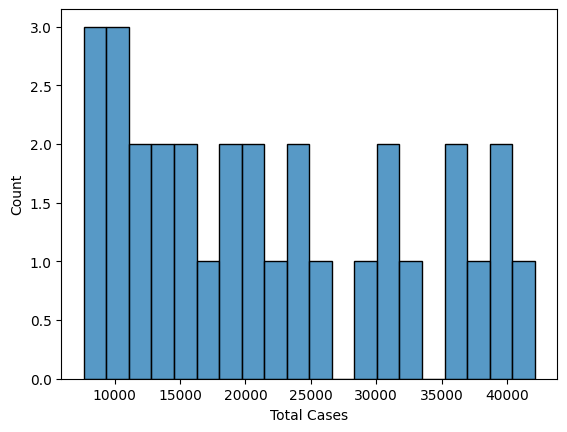

In [35]:
sns.histplot(pakistan['Total Cases'],bins=20)
plt.show()

# Do the Same for USA :

In [37]:
usa = df.loc[df['Country'] == "USA"]
usa.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
213,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
426,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
639,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
852,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0


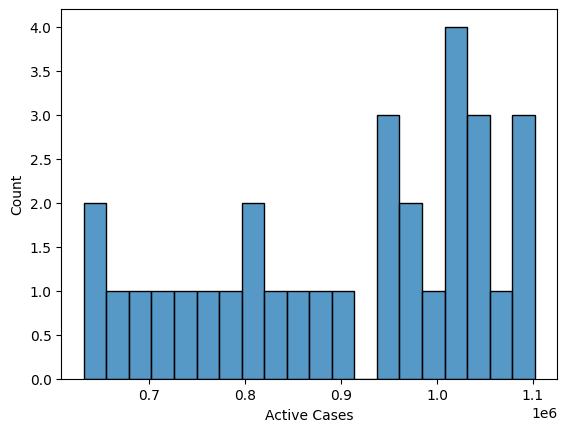

In [38]:
sns.histplot(usa['Active Cases'],bins=20)
plt.show()

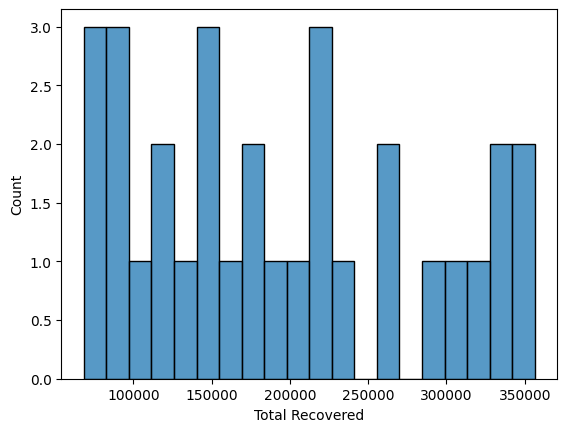

In [39]:
sns.histplot(usa['Total Recovered'],bins=20)
plt.show()